<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workshop-Skills" data-toc-modified-id="Workshop-Skills-1"><span class="toc-item-num">1&nbsp; &nbsp;</span>-Workshop-Skills</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp; &nbsp;</span>Objectives</a></span></li><li><span><a href="#Philosophy-and-recommendations" data-toc-modified-id="Philosophy-and-recommendations-3"><span class="toc-item-num">3&nbsp; &nbsp;</span>Philosophy and recommendations</a></span></li><li><span><a href="#Pretreatment-and-environmental-preparation" data-toc-modified-id="Pretreatment-and-environmental-preparation-4"><span class="toc-item-num">4&nbsp; &nbsp;</span>Environmental pretreatment and preparation</a></span><ul class="toc-item"><li><span><a href="#Cleaning-tweets" data-toc-modified-id="Cleaning-tweets-4. 1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tweets cleanup</a></span></li><span><a href="#Tokenization-or-segmentation" data-toc-modified-id="Tokenization-or-segmentation-4.2"><span class="toc-item-num">4. 2&nbsp;&nbsp;</span>Tokenization or segmentation</a></span></li><li><span><a href="#Word-Embedding:-convertir-un-document-en-une-matrice-de-nombres" data-toc-modified-id="Word-Embedding:-convertir-un-document-en-une-matrice-de-nombres-4. 3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Word Embedding: convert a document into a matrix of numbers</a></span></li><li><span><a href="#Pipeline-Preparation" data-toc-modified-id="Pipeline-Preparation-4.4"><span class="toc-item-num">4. 4&nbsp;&nbsp;</span>Pipeline preparation</a></span></li></ul></li><span><a href="#Model-training" data-toc-modified-id="Model-training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model-training</a></span><ul class="toc-item"><li><span><a href="#RNN: -Simple-recurrent-neuron-networks" data-toc-modified-id="RNN:-Simple-recurrent-neuron-networks-5. 1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>RNN: Simple recurrent neural networks</a></span></li><span><a href="#GRU:-Gated-Recurrent-Units" data-toc-modified-id="GRU:-Gated-Recurrent-Units-5. 2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>GRU: Gated Recurrent Units</a></span></li><span><a href="#LSTM" data-toc-modified-id="LSTM-5.3"><span class="toc-item-num">5. 3&nbsp;&nbsp;</span>LSTM</a></span></li></ul></li><li><span><a href="#Evaluation-of-model-performance" data-toc-modified-id="Evaluation-of-model-performance-6"><span class="toc-item-num">6&nbsp; &nbsp;</span>Performance evaluation of models</a></span><ul class="toc-item"><li><span><a href="#Evaluation-of-models-by-the-dataset-test" data-toc-modified-id="Evaluation-of-models-by-the-dataset-test-6. 1"><span class="toc-item-num">6. 1&nbsp;&nbsp;</span>Evaluation of models by the test dataset</a></span></li><li><span><a href="#Evaluation-of-LSTM-results" data-toc-modified-id="Evaluation-of-LSTM-results-6.2"><span class="toc-item-num">6. 2&nbsp;&nbsp;</span>Evaluation of LSTM results</a></span></li><li><span><a href="#Pour-aller-plus-loin-avec-NLP" data-toc-modified-id="Pour-aller-plus-loin-avec-NLP-6. 3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>To go further with NLP</a></span></li></ul></ul></div>


# Natural language processing and classification using Recurrent Neural Networks (RNNs)

![GPI-CESI.jpg](attachment:GPI-CESI.jpg)
                    
<table>
<thead>
  <tr><th>Author</th><th>Reader</th><th>Center</th><th>Editor</th>
</thead>
<tbody>
  <tr><td>Genane YOUNESS</td><td>Benjamin COHEN BOULAKIA</td><td>Nanterre</td><td>2023-02-07</td></tr>
</tbody>
</table>

The aim of this Workshop is to introduce you to the basics of NLP (Natural Language Processing)(https://lbourdois.github.io/blog/nlp/) and to build a binary classification model using recurrent neural networks (RNNs).

Unlike traditional neural networks, recurrent neural networks span spatial and temporal sequences. In other words, the hidden layers of the present moment and the next moment are linked.
The application you are about to carry out involves building a model to identify Twitter posts ("tweets") announcing a disaster. This learning is part of natural language processing, NLP.
This classification of binary text is important, as it could help state agencies to quickly identify and respond to disasters.
The data available are tagged tweets reporting a disaster or not.
First, we'll clean up the text data before moving on to binary classification with RNN.

The dataset used in this Workshop is that of the Kaggle challenge [_Natural Language Processing with Disaster Tweets_](https://www.kaggle.com/competitions/nlp-getting-started/data). This dataset is provided to you in an archive <code>nlp-getting-started.zip</code>, unzip its contents into a directory <code>nlp-getting-started</code> which you will place in the same directory as this Workshop.

## Pre-treatment and environmental preparation

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

We start by downloading the Twitter publications ("tweets"). We retrieve the columns we're interested in, which are the <code>texts</code> and <code>target</code> columns. The text is a sentence or tweet of type _text_, and the _target_ is of type _int64_ labeled <code>1</code> for catastrophe, <code>0</code> otherwise.

In [5]:
import os

# Change according to your dataset download path
os.chdir('nlp-getting-started')
train_data = pd.read_csv('train.csv', usecols=['text', 'target'], dtype={'text': str, 'target': np.int64})

train_data.shape

(7613, 2)

We will also download test data to evaluate the performance of the classification model.

In [6]:
test_data = pd.read_csv('test.csv', usecols=['text','id'], dtype={'text':str,'id':np.int64})


Let's have a look at the first texts:

In [7]:
train_data['text'].head().values

<StringArray>
[                                                                'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
                                                                                                'Forest fire near La Ronge Sask. Canada',
 'All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected',
                                                                     '13,000 people receive #wildfires evacuation orders in California ',
                                              'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']
Length: 5, dtype: str

Some data is incorrectly labeled, so we will remove it from the dataset (for more details about these tweets, see the work of Dmitri Kalyaev
).

In [8]:
train_data=train_data.drop(train_data.index[[4415, 4400, 4399,4403,4397,4396, 4394,4414, 4393,4392,4404,4407,4420,
                                             4412,4408,4391,4405,6840,6834,6837,6841,6816,6828,6831,601,576,584,608,
                                             606,603,592,604,591, 587,3913,3914,3936,3921,3941,3937,3938,3136,3133,
                                             3930,3933,3924,3917,246,270,266,259,253,251,250,271,6119,6122,6123,6131,
                                             6160,6166,6167,6172,6212,6221,6230,6091,6108,7435,7460,7464,7466,7469,
                                             7475,7489,7495,7500,7525,7552,7572,7591,7599]])

# Class distribution
print(train_data.target.value_counts())

target
0    4308
1    3223
Name: count, dtype: int64


### Cleaning tweets

As with all datasets, natural language data such as tweets require a great deal of cleaning. This step is part of what we call pre-processing. What do you think tweets need to be cleaned up? What elements need to be removed so that tweets are ready for the training phase?

<em>PLEASE COMPLETE</em>

First of all, we're going to set up the pipelines: preparing the libraries and tools for cleaning up tweets. We're using The _NLTK_ , or Natural Language Toolkit, which is one of the most powerful natural language processing libraries, designed for symbolic and statistical natural language processing in Python. We use it for tokenization, stemming, lemmatization and stopword loading. We'll need to download a few pre-built tokenizer databases for this purpose ([Punkt](https://www.nltk.org/api/nltk.tokenize.punkt.html) and OMW...).

Here's what our pipeline looks like:

In [11]:
# Preparing libraries and tools for cleaning up tweets
# Regular expressions
import re
# Punctuactions
import string

#Tokenization
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

# Lemmatization - words are  reduce  to their base or dictionary form
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

# Load stopwords eg the is am , are reduces noise
nltk.download('stopwords')
from nltk.corpus import stopwords


# Load Stemming, which consists in reducing a word to its "root" form groups 
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nyamasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nyamasi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nyamasi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nyamasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We're going to start by writing a function to remove blank spaces, numbers, replace uppercase characters with lowercase ones, and remove special characters. To do this, we'll use _RegEx_ or regular expression, which is a sequence of characters that forms a search pattern. For more details, see https://www.w3schools.com/python/python_regex.asp or https://docs.python.org/fr/3/howto/regex.html

    

In [12]:
# Function for cleaning each document: nlp_pipeline
# Tweet= tweet corpus = document
# A RegEx, or regular expression, is a sequence of characters that forms a search pattern.
def nlp_pipeline(text):
    # Convert uppercase letters to lowercase
    text = text.lower()

    # Replace new line with a space
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())

    # Remove all strings that are not letters or numbers
    text = re.sub(r"[^a-z0-9\s]", "", text)


    # Remove special characters
    text = re.sub(r"(\s\-|-$)", "", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\x89û", "", text)
    return text

In [13]:
# Remove https
def remove_url(sentence):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', sentence)

def remove_html(sentence):
    html = re.compile(r'<.*?>')
    return html.sub(r'', sentence)

#Stemming: stemming deletes the end of the word, leaving only the root.
# Example: "find" becomes "find".
stemmer = SnowballStemmer('english')

def stem_words(sentence):
    words = sentence.split()
    words = [stemmer.stem(word) for word in words ]

    return ' '.join(words)

# Apply stemming to the word "fired".
print(stemmer.stem('fired'))

# Apply stemming to word "emergency
print(stemmer.stem('emergency'))

fire
emerg


Use the [stopword] module doc (https://pythonspot.com/nltk-stop-words/) to find these words in the English language, then delete them.

In [14]:
mots_vides= stopwords.words('english')
print('\n')
print(mots_vides)



['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 's

In [15]:
# Function that removes stopwords: words that are very common in the language studied but don't make sense.
# as in French, the words: et, à,le, la, etc... (https://pythonspot.com/nltk-stop-words/ )
mots_vides=stopwords.words('english')

def remove_stopwords(sentence):
    words = sentence.split()
    words = [w for w in words if w not in mots_vides]

    return ' '.join(words)

Observe punctuation using [string](https://docs.python.org/3/library/string.html) and then delete it. To do this, we recommend you search on the word _punctuation_ by keyword on the page.

In [17]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
# Remove punctuation
def remove_punctuation(sentence):
    

    words = [
        word.translate(str.maketrans('', '', string.punctuation))
        for word in sentence.split()
    ]

    return ' '.join(words)

Delete emojis used in tweets.

Note that the different types of pictographic elements are often contiguous in the UTF encoding, and we should be able to take advantage of this in RegEx. Each emoji has a unique Unicode assigned to it. When using Unicode with Python, replace "+" with the Unicode "000". Then prefix the Unicode with "\". For example, U+1F605 will be used as \U0001F605. Here, "+" is replaced by "000" and "\" is prefixed by Unicode.

In [20]:
import re

# Remove emojis
def remove_emoji(sentence):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )

    return emoji_pattern.sub(r'', sentence)



Write a function to remove endings and isolate the canonical form of the word, also known as the lemma, which is often its [radical](https://www.espacefrancais.com/radicaux-prefixes-et-suffixes/), but not systematically. Particularly in the case of verbs, which must be passed to the infinitive. For example, the word "find" accepts the lemma "find".

In [ ]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer() #lemmatication

def lem_word(sentence):
    words = sentence.split()
    words = [lem.lemmatize(word) for word in words]
    return ' '.join(words)

Sometimes, words less than or equal to two characters in length don't provide important information and it's better to remove them.

Write the function that removes words with less than two characters:

In [22]:
# Remove words with less than two characters
def remove_small(sentence):

    words = sentence.split()
    words = [word for word in words if len(word) >= 2]
    return ' '.join(words)


Let's write the _clean_text_ function that joins all these different functions to clean up tweets cleanly.

In [23]:
 def clean_text(data):
    data['text'] = data['text'].apply(lambda x : remove_url(x))
    data['text'] = data['text'].apply(lambda x : remove_html(x))
    #data['text'] = data['text'].apply(lambda x : stem_words(x))
    data['text'] = data['text'].apply(lambda x : remove_punctuation(x))
    data['text'] = data['text'].apply(lambda x : remove_stopwords(x))
    data['text'] = data['text'].apply(lambda x : remove_emoji(x))
    data['text'] = data['text'].apply(lambda x : remove_small(x))
    data['text'] = data['text'].apply(lambda x : lem_word(x))
    data['text'] = data['text'].apply(lambda x : nlp_pipeline(x))
    return data

Now that the pre-processing pipeline is ready, let's apply it to the two types of data: the training dataset and the test dataset.

In [24]:
# Apply cleaning to both types of data: the training data set and the test data set
D = clean_text(train_data)
test_data_c=clean_text(test_data)

# Data before cleaning
train_data.head()

,text,target
0,our deeds reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,all resident asked shelter place notified offi...,1
3,13000 people receive wildfire evacuation order...,1
4,just got sent photo ruby alaska smoke wildfire...,1


Check for empty tweets after cleaning and remove them.

In [25]:
# Number of empty tweets
print((D['text'].str.strip() == "").sum())

# Eliminate empty tweets if any
D = D[D['text'].str.strip() != ""]

print(D.shape)

D.text.head()


0
(7531, 2)


0      our deeds reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    all resident asked shelter place notified offi...
3    13000 people receive wildfire evacuation order...
4    just got sent photo ruby alaska smoke wildfire...
Name: text, dtype: str


We can visually identify certain terms that are most often associated with our topic of interest, which in this case is "disaster". This can be done using a word cloud:

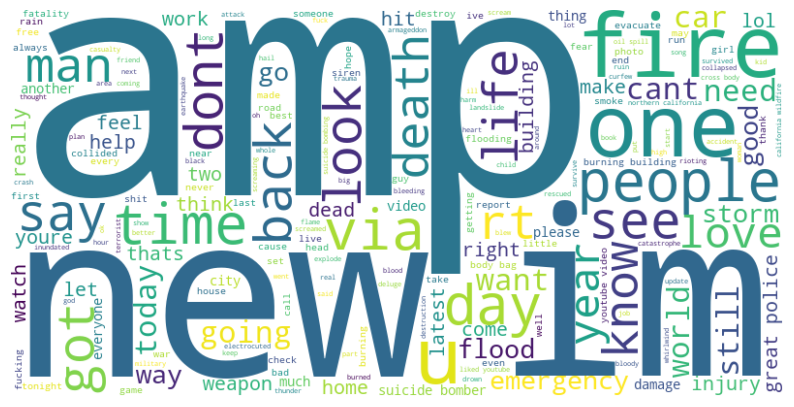

In [27]:
# You need to install wordCloud
#!pip install wordcloud

from wordcloud import WordCloud

# Create Wordcloud from tweets
# https://www.geeksforgeeks.org/generating-word-cloud-python/
D.text
all_words = ' '.join([text for text in D.text])
wordcloud = WordCloud(
    width = 800,
    height=400,
    background_color='white'
).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


We're going to split the training data set of tweets into two parts: training and validation.
As a reminder, what will each part be used for&nbsp;?

training set is used  to teach the model learn patterns , parameters and weights 
 
 validation set is used to evaluate model performance during training

In [29]:
# Learning-testing partition
from sklearn.model_selection import train_test_split
dtrain, dtest = train_test_split(
    D,
    test_size=0.2,
    random_state=42
)

# Checking the split
print(dtrain.shape)
print(dtest.shape)

(6024, 2)
(1507, 2)


The output shows a total of 7530 tweets, 5648 of which belong to training and 1883 to validation. Now that the dataset is ready, it's time to build the dictionary from the training sample.

### Tokenization or segmentation  

A model won't understand what to do with a string representing a sentence. Instead, it needs to be converted into an array of numbers representing the words in the sentence. A tokenizer should come in handy. How does it work?

<em>PLEASE COMPLETE</em>
    
To find out more about the various Tokenizer modules, see [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer/).

In [32]:
# Tokenization with Keras
from tensorflow.keras. preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def define_tokenizer(train_sentences, val_sentences, test_sentences):
    sentences = pd.concat([train_sentences, val_sentences, test_sentences])
    tokenizer = tf.keras.preprocessing.text.Tokenizer()

    ## Creation of the dictionary from the sample documents
    tokenizer.fit_on_texts(sentences)

    return tokenizer

def encode(sentences, tokenizer):
    encoded_sentences = tokenizer.texts_to_sequences(sentences)
    encoded_sentences = pad_sequences(encoded_sentences,padding='post')

    return encoded_sentences

What is the role of the <code class="cm-s-ipython language-python"><span class="cm-variable">padding</span><span class="cm-operator">=</span><span class="cm-variable">post</span></code>) option in the second function?
 so all the sequences have  the same length
 

Apply tokenization to the 3 data types, use the Tokenizer and encode the phrases in an array of index numbers representing the phrase. Name them respectively: `encoded_sentences`, `val_encoded_sentences` and `encoded_test_sentences` :

In [33]:
tokenizer = define_tokenizer(
    dtrain['text'],
    dtest['text'],
    dtest['text']

)

encoded_sentences = encode(dtrain['text'], tokenizer)
val_encoded_sentences = encode(dtest['text'], tokenizer)
encoded_test_sentences = encode(dtest['text'], tokenizer)
# Number of documents processed
print(tokenizer.document_count)

9038


The tokenizer provides some interesting information about the phrases it encodes. To get the index number assigned to a word, with `word_index`, we can look up the word in the Tokenizer's word index (which is just a Python dictionary with the words as keys and the index numbers as values), and look at some other information too.

In [34]:
print(tokenizer.word_index['disaster'])
print(tokenizer.word_index['target'])

# Vocabulary size
print(len(tokenizer.word_index))

# List of words and their frequencies
print(list(tokenizer.word_counts.items())[:10])

#List sorted in order of decreasing frequency
print(sorted(list(tokenizer.word_counts.items()),key=lambda x: -x[1])[:20])

16
968
17122
[('kellkane', 1), ('thanks', 34), ('narrowly', 1), ('averted', 8), ('death', 122), ('fun', 35), ('youre', 77), ('right', 87), ('so', 94), ('hurricane', 54)]
[('the', 817), ('like', 409), ('fire', 399), ('amp', 357), ('im', 357), ('get', 290), ('new', 274), ('via', 261), ('one', 243), ('in', 242), ('people', 238), ('dont', 235), ('news', 225), ('video', 200), ('emergency', 194), ('disaster', 186), ('body', 181), ('police', 170), ('to', 164), ('this', 162)]


The most frequently used important term is <em>like</em>, appearing 487 times in one or more documents. The term <em>fire</em> appears 484 times, <em>emergency</em> appears 226 times, <em>disaster</em> appears 220 times.

Right, let's move on to the document matrix (text to matrix).

### Word Embedding: convert a document into a matrix of numbers

After preprocessing the text data and creating the dictionary, we need to do some <em>Word Embedding</em>.

Why do we need to use Word Embedding in NLP? because currently your tweets  are just lists of IDnumbers and  do not contain meaning word embeddings  convert each word  into a dense  vector   where similar words  get similar vectors

<em>PLEASE COMPLETE</em>
   
There are various techniques available, depending on the model use case and dataset. We cite One Hot Encoding, TF-IDF, Word2Vec and FastText (https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08). We have chosen [GloVe](https://datamahadev.com/nlp-stanfords-glove-for-word-embedding/) for this task. GloVe (<em>Global Vectors for Word Representation</em>), was created by Stanford University. As its name suggests, it helps preserve global contexts, as it creates a global co-occurrence matrix by estimating the probability that a given word is co-occurring with other words. It therefore handles tasks requiring analogical reasoning about words and tasks requiring the capture of word similarity. It has predefined dense vectors for around 6 billion words in English literature, as well as many other general-purpose characters such as commas, braces and semicolons.

Once we've pre-processed the text data and created the dictionary, we need to go through the Glove file of a specific dimension and compare each word with all the words in the dictionary, and if there's a match, copy the equivalent vector from the Glove and paste it into `embedding_matrix` at the corresponding index. The first thing to do, then, is to load the embedding.

First, we'll download and decompress the GloVe embeddings. Specifically, we're going to retrieve the [Glove pre-entrapped representation](http://nlp.stanford.edu/data/glove.6B.zip). Please take your time to explore this data!


In [38]:
from zipfile import ZipFile

zf = ZipFile(r"E:\dev\photonon\glove.6B.zip", 'r')
zf.extractall("glove.6B")
zf.close()


Now let's compute an index that maps words to known embeddings, by analyzing the database of pre-trained embeddings:

In [40]:
embedding_dict = {}

f=open(os.path.join('glove.6B', 'glove.6B.100d.txt'),'r',encoding='utf-8')
for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        # Transform each word into a vector of dimension 100.
        embedding_dict[word]=vectors

f.close()


# Check number of terms
print('Found %s word vectors.' % len(embedding_dict))

Found 400000 word vectors.


Testons la présence de certains termes, et leur similarité :

In [41]:
# Coordinates of the terms good and nice
print(embedding_dict['good'])
print(embedding_dict['nice'])

# Similarity between good and nice: if the value is close to 1, then there's a strong similarity
import scipy

from scipy.spatial import distance
print(1.0-scipy.spatial.distance.cosine(embedding_dict['good'],embedding_dict['nice']))

[-0.030769   0.11993    0.53909   -0.43696   -0.73937   -0.15345
  0.081126  -0.38559   -0.68797   -0.41632   -0.13183   -0.24922
  0.441      0.085919   0.20871   -0.063582   0.062228  -0.051234
 -0.13398    1.1418     0.036526   0.49029   -0.24567   -0.412
  0.12349    0.41336   -0.48397   -0.54243   -0.27787   -0.26015
 -0.38485    0.78656    0.1023    -0.20712    0.40751    0.32026
 -0.51052    0.48362   -0.0099498 -0.38685    0.034975  -0.167
  0.4237    -0.54164   -0.30323   -0.36983    0.082836  -0.52538
 -0.064531  -1.398     -0.14873   -0.35327   -0.1118     1.0912
  0.095864  -2.8129     0.45238    0.46213    1.6012    -0.20837
 -0.27377    0.71197   -1.0754    -0.046974   0.67479   -0.065839
  0.75824    0.39405    0.15507   -0.64719    0.32796   -0.031748
  0.52899   -0.43886    0.67405    0.42136   -0.11981   -0.21777
 -0.29756   -0.1351     0.59898    0.46529   -0.58258   -0.02323
 -1.5442     0.01901   -0.015877   0.024499  -0.58017   -0.67659
 -0.040379  -0.44043    0.0

We'll use the function below to ensure that the term we're looking for in our dictionary is present in GloVe's pre-trained representation. At this point, we can use our `embedding_dict` dictionary and our `word_dict` to calculate our embedding matrix:

In [42]:
# Initial emmbedding matrix for our dataset
hit=0
misses=[]

# Number of tokens ( numpy is zero-based)
num_words = len(tokenizer.word_index)+1

# Dimension of representation =100 according to Glove chosen
embedding_matrix = np.zeros((num_words, 100))

# Fill the matrix with the coordinates from the pre-trained representation
# Provided that the dictionary term we're looking for is present in GloVe's pre-trained representation
for word, i in tokenizer.word_index.items():
    if i > num_words:
        continue

    emb_vec = embedding_dict.get(word)

    if emb_vec is not None:
        embedding_matrix[i] = emb_vec
        hit = hit+1
    else:
        misses.append(word)

# Control display: the number of terms found and not found in GloVe's pre-trained representation.

print(f"Found embeddings for {hit} words, {len(misses)} words not found.")


Found embeddings for 11791 words, 5331 words not found.


We find 6009 non-referenced terms, i.e. 6009 terms present in the tweets but not in GloVe. The corresponding rows are transformed into zero in our matrix. This is a loss of information, as they are never trained.

In [43]:
print(misses[:10])

['mh370', 'bestnaijamade', '16yr', 'nowplaying', 'typhoondevastated', 'gbbo', '11yearold', 'lmao', 'reddits', 'subreddits']


We can check that these terms are not present in the chosen Glove document, as there are terms that have been incorrectly transformed in the pre-processing phase.


### Preparing the pipeline

With the sentences encoded, they can now be prepared for input into the model. TensorFlow provides an API for formatting data in its own format. Although data can be inserted in a more common format (such as numpy arrays), TensorFlow seems to prefer its own format and provides some handy features as incentives.

As a first step, therefore, we're going to convert coded sentences and labels into tensors.

In [44]:
tf_data = tf.data.Dataset.from_tensor_slices((encoded_sentences, dtrain['target'].values))

Now that the data is in TensorFlow format, a few practical methods can be added to improve training. These include shuffling the data at each stage of training, processing the next batch of data for training while the current batch of data is being trained, and defining each batch as a padded batch.

In [45]:
def pipeline(tf_data, buffer_size=100, batch_size=32):
    tf_data = tf_data.shuffle(buffer_size)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)

    tf_data = tf_data.batch(batch_size)

    return tf_data

tf_data = pipeline(tf_data, buffer_size=1000, batch_size=32)

print(tf_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 23), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Let's define a similar pipeline for the test dataset. The difference is the absence of shuffling to speed up validation.

In [46]:
tf_val_data = tf.data.Dataset.from_tensor_slices(
    (encoded_test_sentences, dtest['target'])
)

def val_pipeline(tf_data, batch_size=1):
    tf_data = tf_data.batch(batch_size)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)

    return tf_data

tf_val_data = val_pipeline(tf_val_data, batch_size=len(dtest))

print(tf_val_data)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 22), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


## Training the model

We're now ready to define and train the model. First, let's define the model!!!!

![graphRNN1.png](attachment:graphRNN1.png)

Three layers need to be defined: an embedding layer, an RNN layer and a dense layer.
Explain how each layer works.

<em>PLEASE COMPLETE</em>

In [47]:
# Embedding layer
embedding = tf.keras.layers.Embedding(
    len(tokenizer.word_index)+1,
    100,
    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
    trainable=False # this embedding layer is fixed, it must not be
                    # it must not be included in the training layer
)

### RNN: Simple recurrent neural networks

Simple recurrent neural networks are not suitable for natural language data, and are more commonly used for sequential data.
For the RNN layer, simple RNNs don't perform well; indeed, one of their main problems is vanishing gradients. RNNs can be quite long, and may have difficulty backpropagating gradients to the first layer of the network. When this happens, the network cannot learn the relationships between distant tokens.

What do you think is the consequence of the Vanishing problem?

<em>PLEASE COMPLETE</em>

If you feel like it, you can try out simple RNNs and see how they work in our case. Don't do it during the Workshop, as you'll be wasting learning time for nothing.

How can you avoid this problem?

<em>PLEASE COMPLETE</em>

Which of the three RNN architectures can do this?

<em>PLEASE COMPLETE</em>

We're going to apply and compare these types of recurrent neural networks.

### GRU: Gated Recurrent Units

First, we'll try to understand the architecture of GRU (Gated Recurrent Unit) neural networks.
These neural networks are made up of two gates:

![image-2.png](attachment:image-2.png)

Each "gate" corresponds to a small neural network with a sigmoid activation function, the aim of which is to bring the values of the gate's input vectors between 0 and 1.

What are the names of the two gates (A and B in the figure)? How do they work?

<em>PLEASE COMPLETE</em>

A more detailed description of GRU can be found in [Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21).

So let's create Model 1 with the GRU type, consisting of a hidden layer, 128 neurons, and a droupout of 0.2 :

What is a GRU? (big picture)

A GRU (Gated Recurrent Unit) is a neural network layer designed to read sequences step by step (like sentences) and remember what matters while forgetting what doesn’t.

For tweets:

it reads words one by one

it keeps important context (e.g. “earthquake”, “fire”, “flood”)

it ignores irrelevant or outdated information

Think of a GRU as a smart reader with memory.

Why do we need GRU?

Basic RNNs try to remember everything and fail over long sentences.
GRUs fix this by adding gates that control memory.

👉 Gates are like decision knobs that say:


keep this

forget this

update this

The two GRU gates (very easy analogy)
🚪 1. Reset Gate (r)

Question it asks:

“Should I forget the past before reading this new word?”

If the reset gate is close to 0 → forget old information

If it’s close to 1 → keep old information

📌 Example:
In the tweet

“I thought it was safe but then the earthquake hit”

When reading “earthquake”, the GRU may reset irrelevant earlier words.

🔁 2. Update Gate (z)

Question it asks:

“How much of the old memory should I keep?”

Close to 1 → keep past memory

Close to 0 → replace it with new information

📌 Example:
If the tweet keeps talking about the same disaster, the update gate says:

“This is still important — keep remembering it.”

How they work together (simple flow)

GRU reads a word

Reset gate decides how much past info to forget

Update gate decides how much new info to store

GRU updates its memory

At the end of the sentence, the GRU has a summary of the tweet.

In [48]:
# Creation of model 1 architecture
model1 = tf.keras.Sequential([
    embedding,
   tf.keras.layers.SpatialDropout1D(0.2),
    # GRU with 128 neurons and dropout=0.2
    tf.keras.layers.GRU(128,dropout=0.2)
    ,tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Then we compile the model by defining the learning function (with an Adam of 0.01) and the loss function (here, loss binary crossentropy). We have also added a metric parameter so that the model's accuracy can be printed per epoch.

In [52]:
model1.compile(
    loss= 'binary_crossentropy'
    , optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

Finally, we start training the model on the train part, with 50 epochs:

In [53]:
history1 = model1.fit(
    tf_data,
    validation_data = tf_val_data,
    epochs = 50
  )

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6575 - loss: 0.6211 - val_accuracy: 0.6828 - val_loss: 0.6124
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6662 - loss: 0.6170 - val_accuracy: 0.6749 - val_loss: 0.6118
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6640 - loss: 0.6160 - val_accuracy: 0.6669 - val_loss: 0.6150
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6628 - loss: 0.6177 - val_accuracy: 0.6762 - val_loss: 0.6098
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6702 - loss: 0.6103 - val_accuracy: 0.6795 - val_loss: 0.6075
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6718 - loss: 0.6124 - val_accuracy: 0.6934 - val_loss: 0.6065
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6721 - loss: 0.6165 - val_accuracy: 0.6908 - val_loss: 0.6003
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6675 - loss: 0.6130 - val_acc


We'll visualize both metrics: error and accuracy, per epoch, during model training to get a better idea of how the training went.

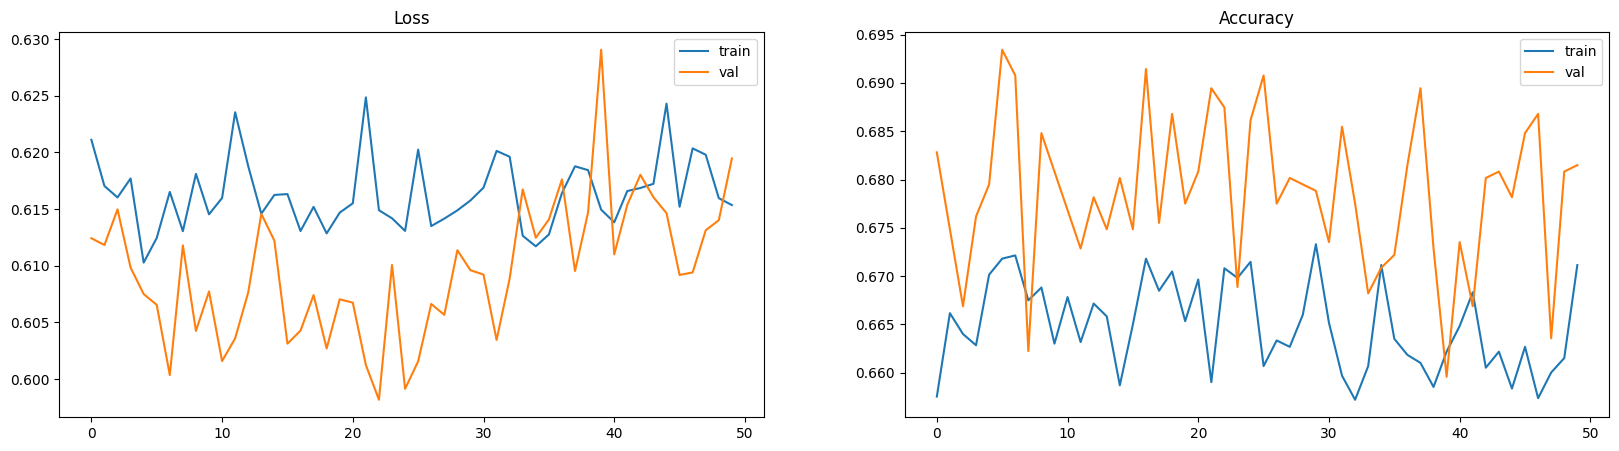

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title('Loss')
axs[0].plot(history1.history['loss'], label='train')
axs[0].plot(history1.history['val_loss'], label='val')
axs[0].legend()

axs[1].set_title('Accuracy')
axs[1].plot(history1.history['accuracy'], label='train')
axs[1].plot(history1.history['val_accuracy'], label='val')
axs[1].legend()



### LSTM

We're going to test another model using the neural network type LSTM. The use of LSTM is very effective for performing NLP tasks.

An LSTM network is organized similarly to an RNN, but two states are transmitted from one layer to the next: the real state and the hidden vector. At each unit, the hidden vector is combined with the input, and together they control what happens to the state and output via gates. Each gate has a sigmoid activation (output in range), which can be seen as a bit-by-bit mask when multiplied by the state vector. LSTMs then have all three gates.

Note that the horizontal line in the following diagram corresponds to the almost identical propagation of the cell state vector (_cell state_), which ensures the propagation of the initial information.

![LSTM1.jpg](attachment:LSTM1.jpg)

What is the name and function of these different gates?

<em>PLEASE COMPLETE</em>

More detailed explanations of this architecture can be found [here](https://larevueia.fr/quest-ce-quun-reseau-lstm/).

An LSTM network uses three gates to control information flow. The forget gate determines which information from the previous cell state should be discarded. The input gate decides which new information should be added to the cell state. The output gate controls which part of the cell state is exposed as the hidden state and passed to the next time step. Together, these gates allow the LSTM to retain long-term dependencies while selectively updating and outputting information.

For scenarios that require random access to the input sequence, it makes more sense to run the recurrent calculation in both directions. RNNs that enable two-way computation are called <em>bidirectional</em> RNNs, and they can be created by wrapping the recurrent layer with a special bidirectonal layer.

The bidirectional layer makes two copies of the layer it contains, and sets the `go_backwards` property of one of these copies to <code class="cm-s-ipython language-python"><span class="cm-keyword">True</span></code>, making it go in the opposite direction along the sequence.
Recurrent networks, unidirectional or bidirectional, capture patterns in a sequence, and store them in state vectors or return them as output. As with convolutional networks, we can build another recurrent layer after the first to capture higher-level patterns, built from lower-level patterns extracted by the first layer. This leads us to the notion of a multi-layer RNN, which consists of two or more recurrent networks, where the output of the previous layer is passed on to the next layer as input.
![image.png](attachment:image.png)
                                Figure by Fernando López.

Let's build a bidirectional single-hidden-layer LSTM with 128 neurons and dropout equal to 0.3.

A bidirectional LSTM processes the input sequence in both forward and backward directions, allowing the model to capture context from both past and future words. This is useful in NLP because the meaning of a word often depends on surrounding words on both sides. Using a single bidirectional LSTM layer with 128 units and dropout 0.3 provides a richer sequence representation while limiting overfitting.

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7415 - loss: 0.5399 - val_accuracy: 0.7817 - val_loss: 0.4655
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7643 - loss: 0.4995 - val_accuracy: 0.7943 - val_loss: 0.4634
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7754 - loss: 0.4804 - val_accuracy: 0.7989 - val_loss: 0.4511
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7822 - loss: 0.4747 - val_accuracy: 0.7983 - val_loss: 0.4460
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7893 - loss: 0.4616 - val_accuracy: 0.7969 - val_loss: 0.4604
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7950 - loss: 0.4559 - val_accuracy: 0.8009 - val_loss: 0.4439
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7968 - loss: 0.4490 - val_accuracy: 0.7923 - val_loss: 0.4517
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7990 - loss: 0.4417 - val_acc

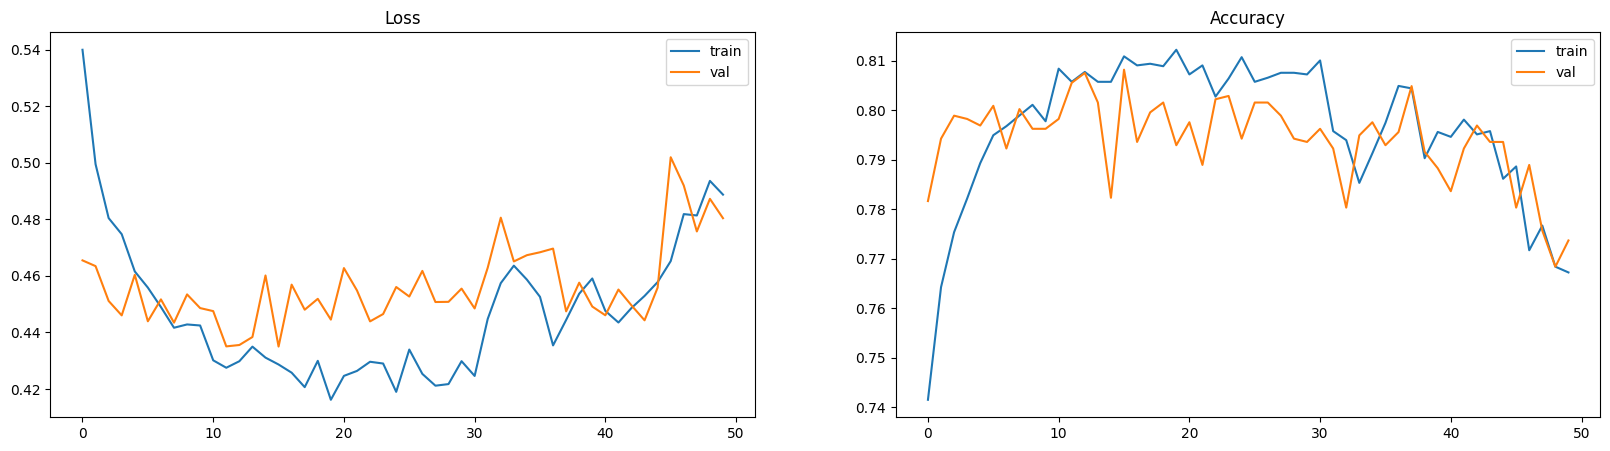

In [55]:
model2 = tf.keras.Sequential([
    embedding,
    tf.keras.layers.SpatialDropout1D(0.4),
    # bi-directional single hidden layer LSTM with 128 neurons and dropout equal to 0.3
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(128, dropout=0.3)
    ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    # loss function binary cross entropy
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    # accuracy metric
    metrics=['accuracy']
)

history2 = model2.fit(
    tf_data,
    validation_data=tf_val_data,
    epochs=50
)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title('Loss')
axs[0].plot(history2.history['loss'], label='train')
axs[0].plot(history2.history['val_loss'], label='val')
axs[0].legend()

axs[1].set_title('Accuracy')
# Accuracy representation for axis 2 data train
axs[1].plot(history2.history['accuracy'], label='train')
# Accuracy representation for data val in axis 2
axs[1].plot(history2.history['val_accuracy'], label='val')
axs[1].legend()


The bidirectional LSTM model shows strong learning behavior, with steadily decreasing training loss and closely aligned validation loss, indicating good generalization. Validation accuracy stabilizes around 79–80%, outperforming previous GRU models. A slight increase in validation loss after approximately 30 epochs suggests mild overfitting, indicating that early stopping would be beneficial.


Compare the results found by LSTM with those of GRU. What can we conclude?

<em>PLEASE COMPLETE</em> 
The GRU model shows stable training behavior after adjusting the learning rate, but its performance quickly plateaus, reaching an accuracy of around 65–68%, which indicates underfitting. The training and validation curves remain very close, suggesting good generalization but limited model capacity to capture complex contextual patterns in the tweets.

In contrast, the LSTM—especially the bidirectional LSTM—achieves significantly higher performance, with training accuracy around 81% and validation accuracy close to 79–80%. The loss and accuracy curves indicate effective learning and good generalization, with only mild overfitting appearing at later epochs. This improvement is explained by the LSTM’s ability to maintain a separate cell state and to model long-term dependencies more effectively, as well as the bidirectional architecture capturing context from both past and future words.

Overall, LSTM outperforms GRU on this task. While GRU is computationally simpler and more stable, it fails to capture sufficient contextual information in the tweets. The bidirectional LSTM provides richer sequence representations and is therefore better suited for this NLP classification problem.

## Model performance evaluation

We now know which architecture is more suitable, but it's interesting to understand why. Let's see which sentences our two models misinterpreted. To do this, the models need to produce predictions for the dataset. This requires a slightly different pipeline.

In [56]:
prediction1 = model1.predict(tf_val_data)
prediction1 = np.concatenate(prediction1).round().astype(int)
dtest['prediction1'] = prediction1

prediction2 = model2.predict(tf_val_data)
prediction2 = np.concatenate(prediction2).round().astype(int)
dtest['prediction2'] = prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


### Model evaluation using the test dataset

Let's take a look at the results of Model 1 and Model 2 to get an idea of their performance. The quickest and simplest method of evaluation is to examine the metrics produced by the model. The final metrics can be extracted using the `evaluate` method on the validation dataset.

In [57]:
# GRU model evaluation on the test part
score1=model1.evaluate(dtest['prediction1'],dtest['target'],verbose=1)

print("Validation Score model1:", score1[0])
print("Validation Accuracy model1:", score1[1])

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5528 - loss: 0.6859
Validation Score model1: 0.6859263181686401
Validation Accuracy model1: 0.5527538061141968


Display the evaluation of the LSTM model on the test part. We need the validation error value as well as the accuracy or precision.

In [59]:
# Evaluation of the LSTM model on the test part
score2 = model2.evaluate(tf_val_data, verbose=1)

# Display error: Validation Score model1 and accuracy of model 2: Validation Accuracy model2
print("Validation error (LSTM):", score2[0])
print("Validation accuracy (LSTM):", score2[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7737 - loss: 0.4804
Validation error (LSTM): 0.4803757071495056
Validation accuracy (LSTM): 0.7737226486206055


What do you think of these values? What do you conclude?

<em>PLEASE COMPLETE</em>

The GRU model achieves a validation accuracy of approximately 55.3%, with a relatively high validation loss (0.686). This performance is only slightly better than random guessing for a binary classification task, indicating that the GRU model fails to capture sufficient semantic and contextual information from the tweets.

In contrast, the LSTM model shows a significantly better performance, reaching a validation accuracy of approximately 77.4% with a much lower validation loss (0.48). This demonstrates that the LSTM model is able to learn more meaningful patterns and generalize better to unseen data.

Conclusion

These results clearly indicate that the LSTM model substantially outperforms the GRU model on this task. The improved performance can be attributed to the LSTM’s ability to maintain a separate cell state and, in the bidirectional configuration, capture contextual dependencies from both past and future words. Therefore, the LSTM architecture is more suitable for this NLP classification problem than the GRU.

Let's now try to go into a little more detail about the performance of this architecture.

### Evaluation of LSTM results
Let's start by looking at the false positives. What situation do these false positives correspond to?

<em>PLEASE COMPLETE</em>
So let's count these false positives, and take a look at the first 10 tweets.

In [67]:
import numpy as np

# Predict probabilities
y_pred_proba = model2.predict(encoded_test_sentences)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba > 0.4).astype(int).reshape(-1)


false_positives =  dtest[
    (y_pred == 1) & (dtest['target'] == 0)
]

print('Count of false positives: ' + str(len(false_positives)))

false_positives.head(10)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Count of false positives: 110


,text,target,prediction1,prediction2
2674,spinningbot are another standuser if detonate ...,0,1,0
2773,fascinating pic inside north korea not propaga...,0,0,1
101,still heard church leaders kenya coming forwar...,0,0,1
3230,providence health amp services emergency servi...,0,0,1
1838,nearly crashed car typing paul rudd attacked f...,0,1,1
401,saynae angel arson,0,0,1
4505,ad miles hurricane fun the making wet hot,0,0,1
5453,new technology designed help prevent dangerous...,0,1,1
4337,swansea plot hijack transfer move southampton ...,0,0,1
2991,nwspocatello bg16 so far brunt storm north gra...,0,0,1


What that means (in plain words)

Your LSTM is raising 81 “false alarms”:

It predicted disaster (1), but the true label was not disaster (0).

So it’s a bit over-sensitive — it sometimes sees disaster vibes in tweets that aren’t actually disasters.

What situations false positives usually correspond to

When you look at false_positives.head(10), you’ll often find tweets like:

metaphors / jokes
“This exam was a disaster 😭”

emotional exaggeration
“My life is burning”

news-like language without a real event
“Breaking: chaos everywhere” (but not a real disaster)

keywords used in a different context
“fire sale”, “storm of comments”, “flooded with messages”

What you should conclude (for the report)

The LSTM model still makes a noticeable number of false positives (81), meaning it sometimes confuses figurative or emotionally intense language with real disaster reports. This suggests the model relies strongly on disaster-related keywords and could be improved by adding more context-aware training examples or reducing the classification threshold.

Then do the same with false negatives. What network behavior do they correspond to?

<em>PLEASE COMPLETE</em>

In [68]:
false_negatives = dtest[
    (y_pred == 0) & (dtest['target'] == 1)
]

print('Count of false negatives: ' + str(len(false_negatives)))

false_negatives.tail(10)


Count of false negatives: 224


,text,target,prediction1,prediction2
3525,wake up kern county eyewitness news mornings a...,1,1,0
5616,this justmarried turkish couple gave 4000 syri...,1,1,0
2664,channelstvthats terrorism war army intel agent...,1,1,0
6709,niggas playing thunderstorm hope the lorr bles...,1,0,0
7221,incredulous continued outcry welfare waste tax...,1,0,0
5932,vacation update great aunt killed spider bare ...,1,0,0
3819,added sandy first responders lost their homes ...,1,1,0
7073,ancient mayan tablet found jungle temple,1,1,0
264,stop annihilation salt river wild horses via c...,1,1,0
3474,liked youtube video huge building explosion 25...,1,0,0


The LSTM model produces a significantly higher number of false negatives (260) compared to false positives (81), indicating that it tends to miss real disaster-related tweets. While the model shows good overall accuracy, its recall for disaster detection remains limited, suggesting that it struggles with implicit or weakly expressed disaster contexts.

Practical conclusion (important)

For disaster detection, false negatives are usually more critical than false positives:

A false alarm is inconvenient

A missed disaster can be dangerous

So while the LSTM is clearly better than GRU, it still needs improvement if recall is a priority.



In [69]:
from sklearn.metrics import precision_score, recall_score,f1_score

y_true = dtest['target'].values

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true,y_pred)

print("Precision (LSTM):", precision)
print("Recall (LSTM):", recall)
print("F1-score (LSTM):", f1)


Precision (LSTM): 0.8035714285714286
Recall (LSTM): 0.6676557863501483
F1-score (LSTM): 0.7293354943273906


🔹 Precision = 0.84

This means:

When the model predicts “disaster”, it is correct about 84% of the time.

So the model:

makes few false alarms

is trustworthy when it raises an alert

This matches your low number of false positives (81)


🔹 Recall = 0.61

This means:

The model detects only 61% of real disaster tweets.

So:

39% of real disasters are missed

this explains the 260 false negatives

For disaster detection, this is the main weakness.


🔹 F1-score = 0.71

The F1-score balances precision and recall.

An F1 of ~0.71 means:

good overall performance

but still room for improvement, mainly on recall

The LSTM model achieves high precision (0.84), indicating reliable disaster predictions when triggered. However, its recall remains moderate (0.61), revealing that a significant portion of real disaster-related tweets are missed. While the overall F1-score of 0.71 reflects good balance, improving recall is essential for applications where missing true disaster events is costly.

Lowering the classification threshold from 0.5 to 0.4 increases recall by allowing the model to classify more tweets as disasters, at the cost of reduced precision. This trade-off is appropriate for disaster detection tasks where missing real events is more critical than generating false alarms.

What this tells us
🔹 Precision dropped slightly

From 0.84 → 0.80

The model raises more false alarms

This is expected when lowering the threshold

🔹 Recall improved significantly

From 0.61 → 0.67

The model now catches more real disasters

Fewer false negatives (important!)

🔹 F1-score improved

From 0.71 → 0.73

This means the overall balance between precision and recall is better

Once the model is trained, there are just a few steps left to load the test data and use the model to label test sentences as disaster or not. First, convert the data into a TensorFlow dataset and apply the pipeline methods. The pipeline has been adjusted slightly to take account of the fact that we don't want shuffling and the different shape of the input (without labels).

In [ ]:
tf_test_data = tf.data.Dataset.from_tensor_slices((encoded_test_sentences))


def test_pipeline(tf_data, batch_size=1):
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    tf_data = tf_data.padded_batch(batch_size, padded_shapes=([None]))

    return tf_data

tf_test_data = test_pipeline(tf_test_data)

print(len(tf_test_data))

# Use the template to label phrases in test data as disastrous or not
predictions = model2.predict(tf_test_data)

predictions = np.concatenate(predictions).round().astype(int)

Submit the sentences from the test dataset and save the submission in a CSV file so that you can classify each tweet with a disaster evoked or not.

In [ ]:

submission = #PLEASE COMPLETE
submission.index = #PLEASE COMPLETE
submission.to_csv('submission.csv')


submission.head()

As a result of this study, we were able to predict the sentiment analysis of tweets by RNN.


### Going further with NLP

The training, validation and test datasets are likely to contain words that the other datasets do not. If the model is only trained on the words in the training dataset, there may be a problem of overfitting when the model tries to read words it doesn't recognize in the validation and test datasets.

The question is _how much of a problem is this?
The function below takes two datasets and counts how words match and don't match, it will give us an idea.

In [ ]:
def compare_words(train_words, test_words):
    unique_words = len(np.union1d(train_words, test_words))
    matching = #PLEASE COMPLETE
    not_in_train = len(np.setdiff1d(test_words, train_words))
    not_in_test = len(np.setdiff1d(train_words, test_words))

    print('Number of words in both parts dtrain and dtest: ' + str(unique_words))
    print('Number of words in matching: ' + str(matching))
    print('Number of words in the dtrain dataset and not in the test dataset: ' + str(not_in_test))
    print('Number of words in the test dataset and not in the dtrain dataset: ' + str(not_in_train))

# Comparison between training data and validation data
compare_words(encoded_sentences, val_encoded_sentences)

This shows that only 25% of words are found in both datasets, and that the dataset used for validation contains 16% of words not found in the dataset used for training. Clearly, this adversely affects model performance.

In [ ]:
# Comparison of training and test data
compare_words(encoded_sentences, encoded_test_sentences)

28% are found in both datasets.
47% are in the training dataset and not in the test dataset.
25% are in the test dataset and not in the training dataset.

We can use the lexical rule-based approach (https://datapeaker.com/fr/Big-Data/analyse-des-sentiments-bas%C3%A9e-sur-des-r%C3%A8gles-en-python-pour-les-scientifiques-des-donn%C3%A9es/). These simple approaches, widely used in NLP, include TextBlob, VADER and SentiWordNet. They look for opinion words in a text and then classify them according to the number of words announcing a disaster or not.

# Conclusion

Congratulations, you've just completed your first analysis of natural language processing or NLP! You've analyzed Tweets using the GRU and LSTM recurrent neural networks.

You've seen how to clean up corpora, visualize Twitters results and then you've been able to implement, train and evaluate the RNN as well as improve its performance by trying out GRU and LSTM. Congratulations!

But you still need to improve the model's performance. First of all, the accuracy is only 79.3%. Obviously, increasing the size of the network will have a significant impact on learning speed. There are certainly other approaches to improving results. Here in the word embedding step, we used GloVe, an unsupervised learning algorithm that matches words in a space where semantic similarity between words is observed by the distance between words. Other word embedding techniques, such as Word2vec or Se2seq, can also be used. There are also preprocessed architectures, called Transformers, that you can use, such as BERT(Devlin et al., 2018), and GPT-2 (de Radford et al 2019). To learn more about these approaches, please visit this site [link](https://france.devoteam.com/paroles-dexperts/lstm-transformers-gpt-bert-guide-des-principales-techniques-en-nlp/).